<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/Apparel_Proj_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis: Proj 2 Col Rakesh Pedram

##Data Wrangling and Import
Using Google Colabs with files in google drive.

In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Dataset/apparel.csv'

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
# Describe numerical variables to check for missing values, outliers, etc.
print(df.describe())
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df.info())

Mounted at /content/drive
        Date        Time State     Group  Unit  Sales
0  01-Oct-20     Morning    WA      Kids     8  20000
1  01-Oct-20     Morning    WA       Men     8  20000
2  01-Oct-20     Morning    WA     Women     4  10000
3  01-Oct-20     Morning    WA   Seniors    15  37500
4  01-Oct-20   Afternoon    WA      Kids     3   7500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.00

Check for outliers for sales and unit numeric field. Data is clean. Unit and sales are integers only date field needs conversion

In [ ]:
condition = df['Sales'] > 6500 # Sales more than 75 percentile to check outliers
df_sorted = df[condition].sort_values(by='Sales')

# Display the sorted DataFrame
print(df_sorted['Sales'])
condition = df['Unit'] <8 # Sales more than 75 percentile to check outliers
df_sorted = df[condition].sort_values(by='Unit')

# Display the sorted DataFrame
print(df_sorted['Unit'].count())

1643


There are no outliers in the Sales and unit. Will run a histogram to see my numeric data is normalised.

In [ ]:
# Convert date field to date obj

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
print (df['Date'].dtype)
#Converted to date time field now can be used in timeline charts
#Rest is string data

datetime64[ns]


datetime64[ns]


In [ ]:
# Check no nulls in date field
df[df.notna()]
df[df.isna()]
df[df.notna()].count()
#df[df.isna()].count()
print(df.isna().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


I have no nulls data is clean. no negative values.

##Normalisation of data
I studied the problem and there is no analysis for which I might need a normalised data that will be required to be fed in a model. However sticking to the directions. Used a Min-Max Scalar to normalise my sales and Unit data just for learning. Using built in sklearn lib function.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create a min-max scaler object
scaler = MinMaxScaler()

# Fit and transform the dataframe
df_norm = scaler.fit_transform(df[['Unit','Sales']])

# Convert the numpy array to a dataframe
df_norm = pd.DataFrame(df_norm, columns=['Unit_norm', 'Sales_norm'])

# Print the dataframe
print(df_norm)

      Unit_norm  Sales_norm
0      0.095238    0.095238
1      0.095238    0.095238
2      0.031746    0.031746
3      0.206349    0.206349
4      0.015873    0.015873
...         ...         ...
7555   0.190476    0.190476
7556   0.206349    0.206349
7557   0.206349    0.206349
7558   0.142857    0.142857
7559   0.174603    0.174603

[7560 rows x 2 columns]


Using the Group by function to make analysis

In [ ]:
# Group data by state or other relevant columns
grouped_data = df.groupby("State")
print(grouped_data.first())
#Group by Time
grouped_data = df.groupby("Time")
print(grouped_data.first())

           Time  Group  Unit   Sales
State                               
 NSW    Morning   Kids    39   97500
 NT     Morning   Kids    13   32500
 QLD    Morning   Kids    20   50000
 SA     Morning   Kids    12   30000
 TAS    Morning   Kids    13   32500
 VIC    Morning   Kids    49  122500
 WA     Morning   Kids     8   20000
           State  Group  Unit  Sales
Time                                
 Afternoon    WA   Kids     3   7500
 Evening      WA   Kids    15  37500
 Morning      WA   Kids     8  20000


##pivot tables
The pivot tables are ideal for this data

In [ ]:
# Example 1: Total sales by group and state
pivot_table1 = df.pivot_table(index="Group", columns="State", values="Sales", aggfunc="sum")
# Example 2: Sum of sales for time of day
pivot_table2 = df.pivot_table(index="Time", values="Sales", aggfunc="sum")
print(pivot_table1)
print(pivot_table2)

State          NSW       NT      QLD        SA      TAS       VIC       WA
Group                                                                     
 Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000
 Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500
 Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500
 Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500
                Sales
Time                 
 Afternoon  114007500
 Evening    112087500
 Morning    114207500


# Data Analysis

In [ ]:
# Descriptive statistics
print(df[['Unit','Sales']].describe())

# Top and bottom sales groups/states
top_group = grouped_data["Sales"].mean().idxmax()
bottom_group = grouped_data["Sales"].mean().idxmin()

top_state = df[df["Sales"] == df["Sales"].max()]["State"].values[0]
bottom_state = df[df["Sales"] == df["Sales"].min()]["State"].values[0]
# Which group is genetating highest sales
# Total sales by state
pivot_table3 = df.pivot_table(index="State", values="Sales", aggfunc="sum")
print('Table of state wise revenue')
print(pivot_table3)
# Which group is generating lighest sale
pivot_table4 = df.pivot_table(index="Group", values="Sales", aggfunc="sum")
print('Table of group wise revenue')
print(pivot_table4)

# Time analysis done over timeline in Date
# To do timeline anaalysis set the date as index and then use the resample function
#df = df.set_index("Date")

# Weekly, monthly, quarterly reports
weekly_sales = df.resample("W-Sun")["Sales"].sum()
monthly_sales = df.resample("M")["Sales"].sum()
quarterly_sales = df.resample("Q")["Sales"].sum()
print(f'The weekly sales are /n {weekly_sales}')
print(f'The monthly sales are /n {monthly_sales}') # Should give just 3 entries
print(f'The quarterly sales are /n {quarterly_sales}') # This data is only for one quarter

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000
Table of state wise revenue
           Sales
State           
 NSW    74970000
 NT     22580000
 QLD    33417500
 SA     58857500
 TAS    22760000
 VIC   105565000
 WA     22152500
Table of group wise revenue
             Sales
Group             
 Kids     85072500
 Men      85750000
 Seniors  84037500
 Women    85442500
The weekly sales are /n Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: S

# Data Visualisation
○	State-wise sales analysis for different groups (kids, women, men, and seniors)
○	Group-wise sales analysis (kids, women, men, and seniors) across different states.
○	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?


Text(0.5, 1.0, 'Quarterly Sales')

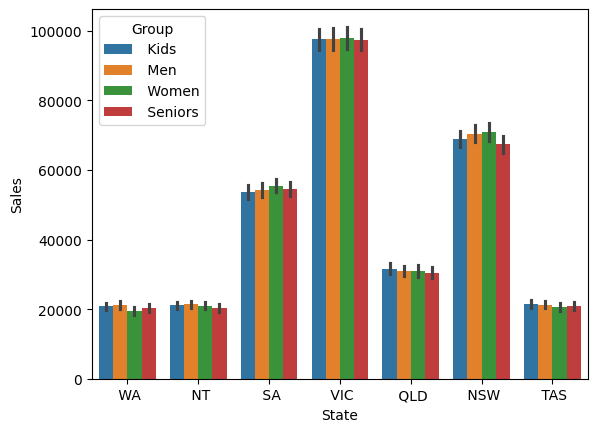

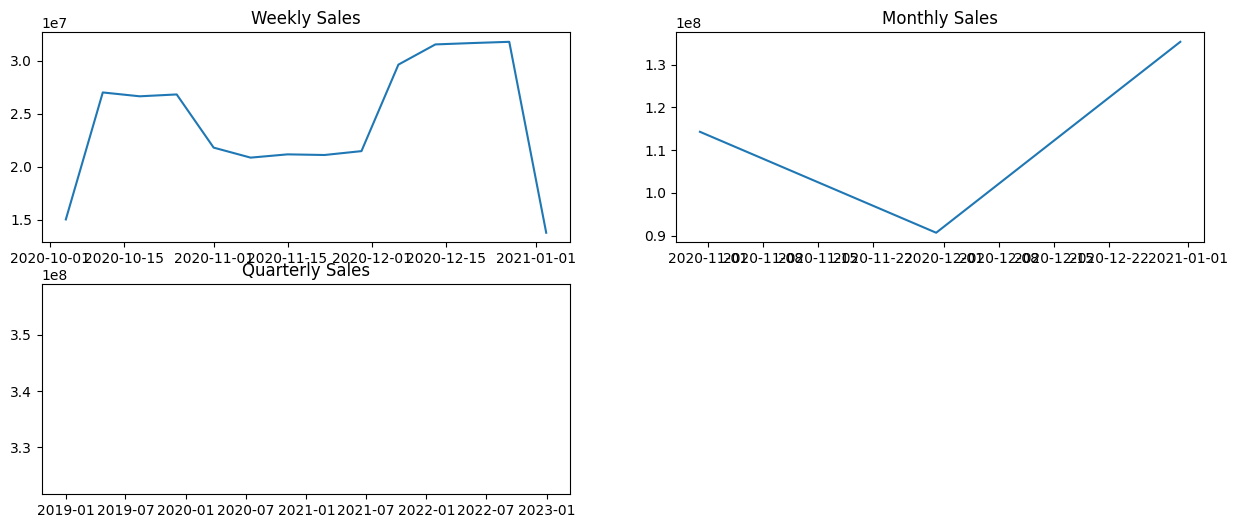

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# State-wise sales analysis for different groups
sns.barplot(x="State", y="Sales", hue="Group", data=df)



# Time-of-day analysis
# ... use appropriate libraries and data transformation for analysis

# Daily, weekly, monthly, quarterly charts
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(weekly_sales)
plt.title("Weekly Sales")
plt.subplot(2, 2, 2)
plt.plot(monthly_sales)
plt.title("Monthly Sales")
plt.subplot(2, 2, 3)
plt.plot(quarterly_sales)
plt.title("Quarterly Sales")# Single value wont show



##Gruoup wise sale

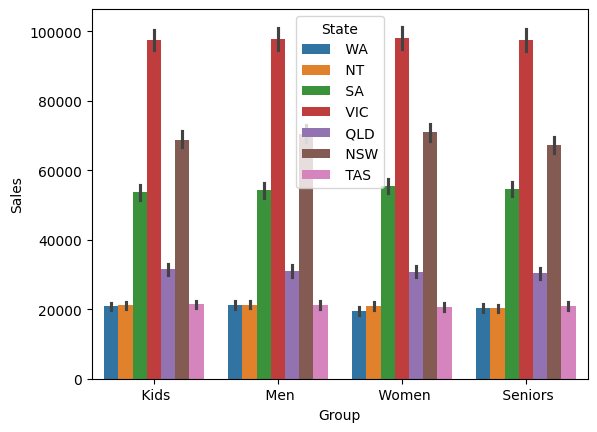

In [ ]:
# Group-wise sales analysis across different states
plot1=sns.barplot(x="Group", y="Sales", hue="State", data=df)

##Impact of time on sales

<Axes: xlabel='State', ylabel='Sales'>

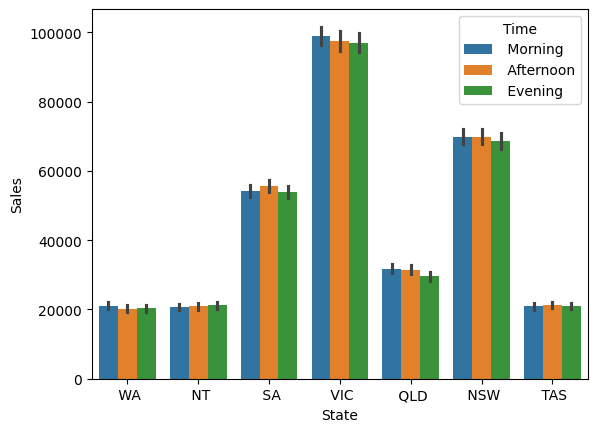

In [ ]:
sns.barplot(x="State", y="Sales", hue="Time", data=df)

Group slaes Pie chart


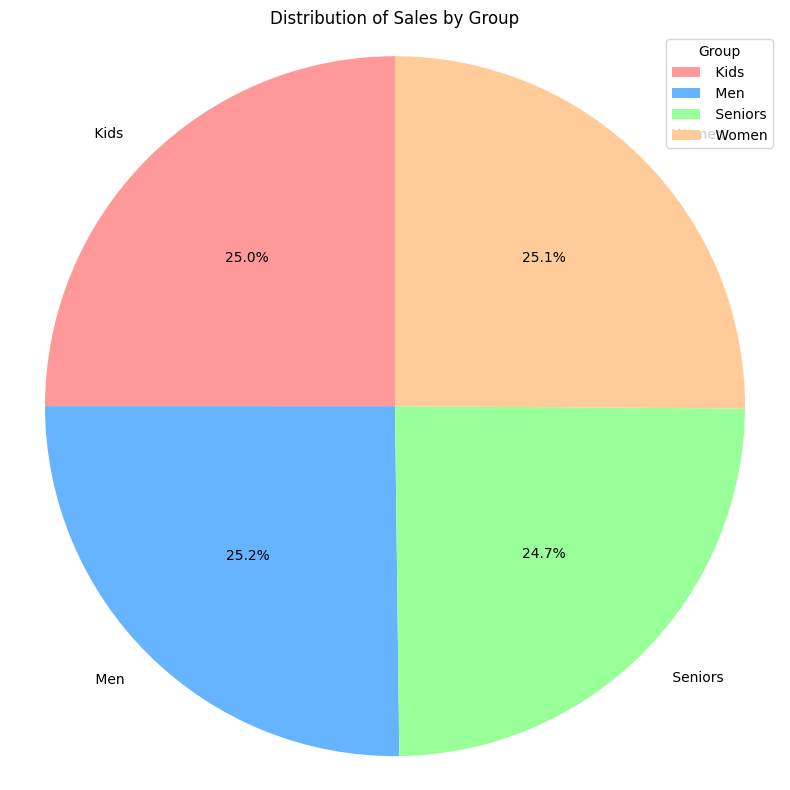

In [ ]:
# Create a DataFrame showing total sales per group
group_sales = df.groupby("Group")["Sales"].sum().reset_index()

# Create the pie chart
# Define colors for each group (optional)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_sales["Sales"], labels=group_sales["Group"], autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Distribution of Sales by Group")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

# Customize the chart (optional)
plt.legend(title="Group")
plt.tight_layout()

# Show the chart
plt.show()

# Report Generation


*   Libraries for visualisation
I am using seborn lib for bar charts and metplot for the line plots

*  Data Analysis
State(VIC) contributes to more than 30% revenue and state WA is about 6%

*   Unit sales reflect the total sales pattern
*   There is nho impact of time on the overall sales. All are almost equal.

*   Histogram of sales show max sales are in the range 4000-5000. This is a right skewed data. Which is standard for sales
*   There is insignificant variation between the sales figures of the group












##Visualisation of descriptive data
The code generates descriptive stats for All numeric data in the df


Analyzing column: Unit


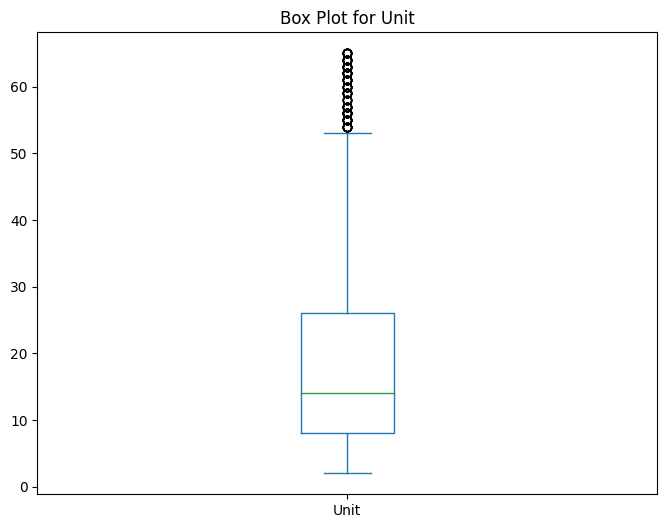

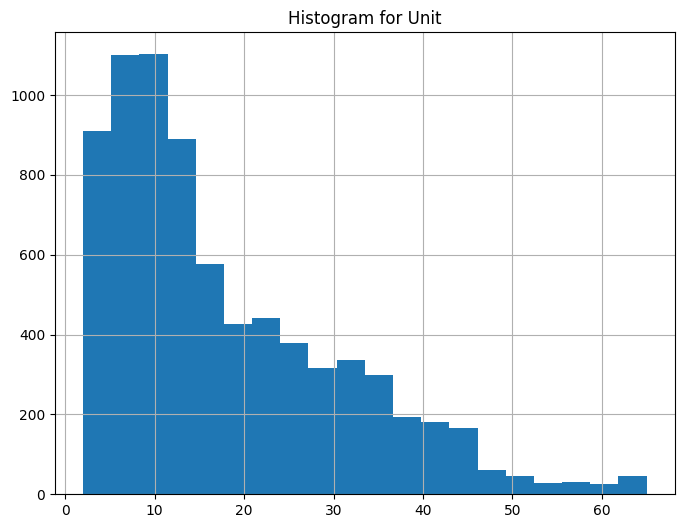


Analyzing column: Sales


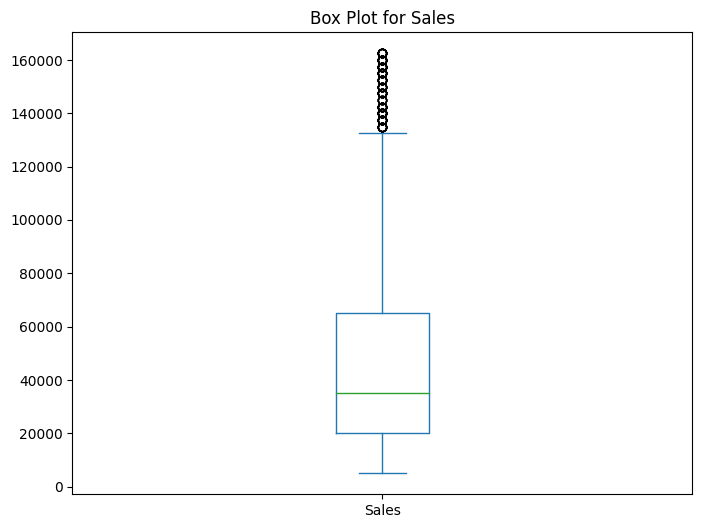

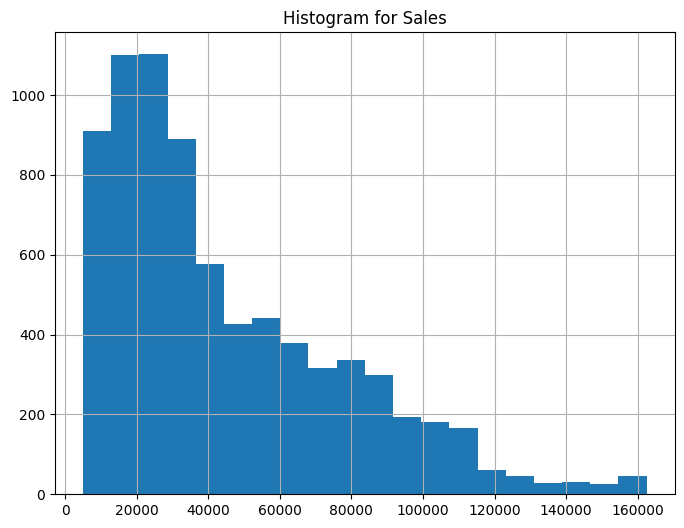

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2020-10-01 to 2020-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Unit    7560 non-null   int64
 1   Sales   7560 non-null   int64
dtypes: int64(2)
memory usage: 177.2 KB


,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [ ]:
# This is a code sinp from my previous project repurposed for analysis
import scipy.stats as stats
df.columns

# Identify numerical columns for analysis
#Exclude your binaries . they got reset to zero with automated Winsorization

#exclude_list = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#       'AcceptedCmp2', 'Response', 'Complain']
exclude_list=[]
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_list)

#numerical_columns = df.select_dtypes(include=['int64', 'float64']) ---- this didnt work
# Careful with outlier check on binary columns. It will set them to zero
# Create a function for outlier detection and treatment
def detect_and_treat_outliers(column):
    """
    Detects outliers in a numerical column using IQR and removes or winsorizes them.

    Args:
        column: The numerical column to analyze.

    Returns:
        The cleaned column with outliers removed or winsorized.
    """

    # Calculate IQR and quantiles
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Identify potential outliers (values beyond 1.5 IQR from quartiles)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]


    # 1. Winsorize outliers (replace with nearest non-outlier value)
    # Choosing winsorize with clip method as I want the shape of my data frame unchanged with no nulls.
    # Another method we can use the matstats library the command is slick!
    #from scipy.stats import mstats
    #cleaned_column = mstats.winsorize(df[column_to_winsorize], limits=(lower_limit, upper_limit))

    cleaned_column = column.clip(lower_bound, upper_bound,axis=0)

    return cleaned_column
clean_df=pd.DataFrame()
# Iterate through numerical columns and visualize distributions
#Basic plot for every column descriptive anaysis.
#Eyeballing the data is much better I feel and faster. Gimmmick
for column in numerical_columns:
    print(f"\nAnalyzing column: {column}")

    # Create box plot
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='box')
    plt.title(f"Box Plot for {column}")
    plt.show()

    # Create histogram
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=20)
    plt.title(f"Histogram for {column}")
    plt.show()

    # Detect and treat outliers (use the chosen method from the function)

    clean_df[column] = detect_and_treat_outliers(df[column])
    #df[column] = detect_and_treat_outliers(df[column])
clean_df.info()
clean_df.describe()
df.describe()

# Save the cleaned DataFrame if needed
# cleaned_df.to_csv('cleaned_data.csv', index=False)

